## Loading boston dataset from scikit learn

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
boston=load_boston()
type(boston)

sklearn.utils.Bunch

## Below is the only syntax used to describe 'Bunch' type of data

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Assigning features to X and target to y

In [5]:
X= boston.data
y= boston.target
print("X shape is " + str(X.shape) + "and y shape is " + str(y.shape))

X shape is (506, 13)and y shape is (506,)


## Split Data into Train and Test sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30)

#test_size parameter will always hold value between 0 and 1

print("X_train shape is " + str(X_train.shape) + "and y_train shape is " + str(y_train.shape))
print("X_test shape is " + str(X_test.shape) + "and y_test shape is " + str(y_test.shape))

X_train shape is (354, 13)and y_train shape is (354,)
X_test shape is (152, 13)and y_test shape is (152,)


## Fit the data into Linear Regression model

In [8]:
#import necessary model
from sklearn.linear_model import LinearRegression

#instantiate the estimator object
lin_reg_boston = LinearRegression(normalize=True)
lin_reg_boston.fit(X_train,y_train)

#As the model is built, we can now check the co-effcient and intercept values
print(lin_reg_boston.intercept_)
print(lin_reg_boston.coef_)

35.60366481345675
[-4.46564780e-02  4.09290651e-02  1.90177313e-02  1.94265278e+00
 -1.22280230e+01  3.78541395e+00 -1.97553353e-03 -1.33719859e+00
  2.53404581e-01 -1.18222069e-02 -1.03697805e+00  8.67612329e-03
 -5.59293374e-01]


## Model Prediction

In [9]:
y_pred =lin_reg_boston.predict(X_test)

In [10]:
pd.DataFrame(y_pred, y_test)

,0
19.8,22.084918
24.0,25.078447
22.8,24.430088
30.1,25.739299
5.0,11.598322
...,...
21.0,20.764280
21.1,20.819525
20.0,20.238168
24.3,29.666253


## Evaluating the Model

In [11]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print("The RMSE value of the Model is",RMSE)

The RMSE value of the Model is 4.953415718861641


## Checking correlation with heatmap

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

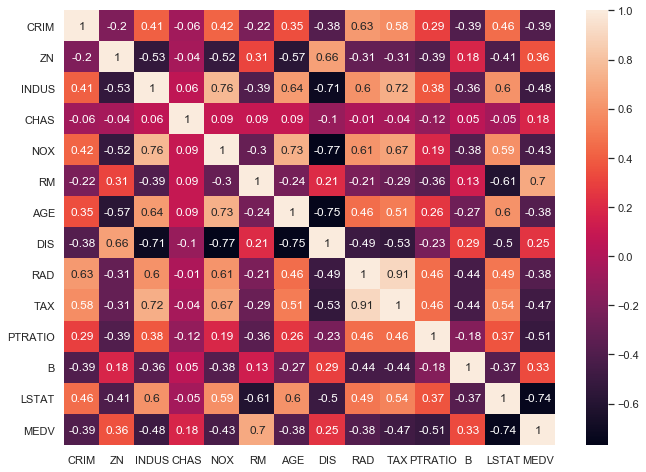

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

#only features are being put in this case
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['MEDV']= boston.target
df_boston.shape
correlation = df_boston.corr().round(2)
print(correlation)
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(data=correlation, annot=True)